In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg, interpolate, optimize, spatial

%matplotlib inline

## Задание 1

In [2]:
sentences = []
with open('sentences.txt') as file:
    for line in file:
        sentences.append(line.strip().lower())

In [3]:
import re

words = set()
for i in range(len(sentences)):
    sentences[i] = list(filter(len, re.split('[^a-z]', sentences[i])))
    words.update(sentences[i])

In [4]:
words = dict(enumerate(words))

In [5]:
from collections import Counter

n = len(sentences)
d = len(words)
matrix = np.eye(n,d)
for i in range(n):
    c = Counter(sentences[i])
    for j in range(d):
        matrix[i][j] = c[words[j]]

In [6]:
dists = []
for i in range(n):
    dists.append(spatial.distance.cosine(matrix[0], matrix[i]))

In [7]:
dists.sort()

In [9]:
min1, min2 = np.inf, np.inf
ind1, ind2 = -1, -1
for i in range(1,n):
    if dists[i] < min1:
        min2, min1 = min1, dists[i]
        ind2, ind1 = ind1, i
    elif dists[i] < min2:
        min2 = dists[i]
        ind2 = i

ind1, ind2        

(1, 2)

In [10]:
file = open('submission1.txt', 'w', newline='')
file.write('4 6')
file.close()

## Задание 2

In [ ]:
import math

In [67]:
f = lambda x: math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)
x = np.arange(1,15, 0.1)
y = list(map(f, x))

In [71]:
b = np.array([f(1), f(4), f(10), f(15)])
x_new = np.array([1,4,10,15])

In [72]:
g = interpolate.interp1d(x_new, b, kind='cubic')

In [73]:
y_new = np.array(list(map(g, x)))

In [74]:
A = np.array([[1,1,1,1],
              [64,16,4,1],
              [1000,100,10,1],
              [3375,225,15,1]])

In [75]:
w = linalg.solve(A,b)
h = lambda x: w[0]*x**3 + w[1]*x**2 + w[2]*x + w[3]
y_approx = list(map(h, x))

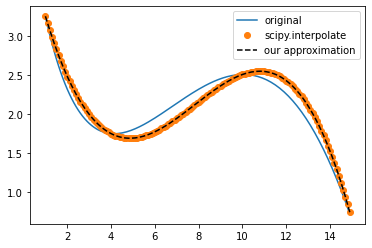

In [109]:
plt.plot(x, y, label='original')
plt.plot(x, y_new, 'o', label='scipy.interpolate')
plt.plot(x, y_approx, '--', color='black', label='our approximation')
plt.legend()
plt.show()

In [110]:
line = ' '.join(list(map(lambda x : str(x), w[::-1])))

In [111]:
file = open('submission2.txt', 'w', newline='')
file.write(line)
file.close()